# Algoritmo para montagem da Matriz Admitância Ybar
 Lucas Eduardo Silva Braga 201570023

# Circuio 

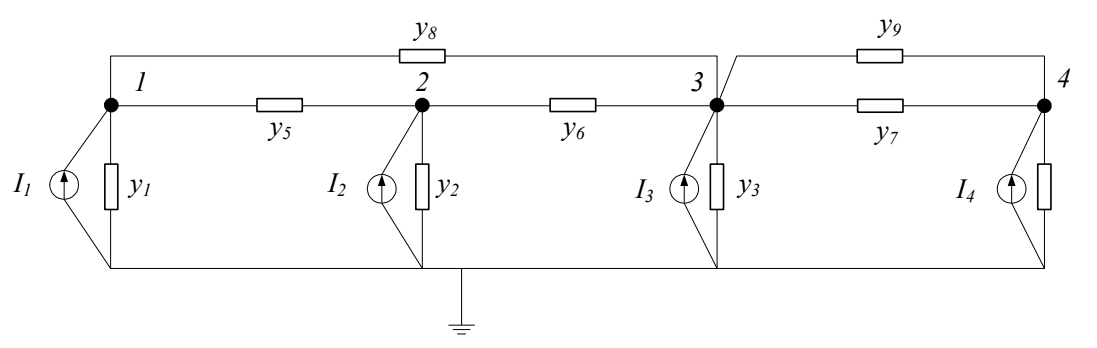

# Lei de formação

$$
y_{i} = 0.1i + ji
$$

In [1]:
import numpy as np
import pandas as pd
import cmath

#Dados de Linha para informar conexões elétricas

DLIN = {
    "From": [1,1,1,2,2,3,3,3,4],
    "To":   [1,2,3,2,3,3,4,4,4],
    "ykm":  [1,5,8,2,6,3,7,9,4]
}

DBAR = int(max(DLIN["From"]))
Ybar = np.zeros((DBAR ,DBAR), dtype="complex")

In [2]:
for i in range(len(DLIN["From"])):
  f = DLIN["From"][i] -1
  to = DLIN["To"][i] -1
  y_pos = DLIN["ykm"][i]  
  ykm = complex(0.1*y_pos,y_pos)
  # Adicionando todas as admitancias na diagonal
  Ybar[f,f] = Ybar[f,f] + ykm
  if f != to:
    Ybar[to,to] = Ybar[to,to] + ykm
  # Adicionando fora da diagonal
    Ybar[f,to] = Ybar[f,to] - ykm
    Ybar[to,f] = Ybar[f,to]

In [3]:
df_YBAR = pd.DataFrame(Ybar, index=np.arange(1,DBAR+1), columns=np.arange(1,DBAR+1))
df_YBAR

,1,2,3,4
1,1.4+14.0j,-0.5-5.0j,-0.8-8.0j,0.0+0.0j
2,-0.5-5.0j,1.3+13.0j,-0.6-6.0j,0.0+0.0j
3,-0.8-8.0j,-0.6-6.0j,3.3+33.0j,-1.6-16.0j
4,0.0+0.0j,0.0+0.0j,-1.6-16.0j,2.0+20.0j
